# An end to end heart disease project

## Things to required in Machine learing

1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentations

In [1]:
# import all the things that are required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import plot_roc_curve 

e:\machine\sample_project\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
e:\machine\sample_project\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
e:\machine\sample_project\env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# load the data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
np.shape(df)

(303, 14)

# exploratory data analysis ( EDA )

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

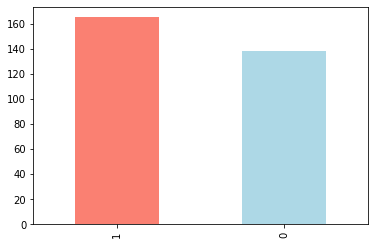

In [7]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# are there any mising values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


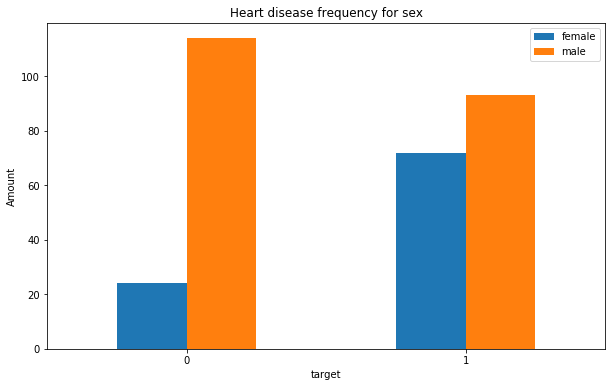

In [13]:
# create a plot of crosstab
pd.crosstab(df['target'], df['sex']).plot(kind='bar',figsize=(10,6))

plt.title('Heart disease frequency for sex')
plt.ylabel('Amount')
plt.legend(['female','male'])
plt.xticks(rotation=0);

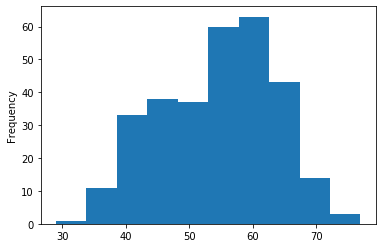

In [14]:
df.age.plot.hist()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

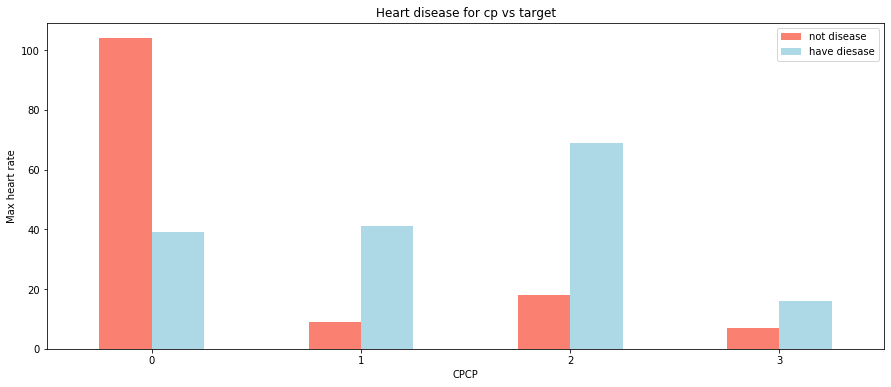

In [15]:
pd.crosstab(df.cp , df.target).plot(kind='bar',figsize=(15,6),color=['salmon','lightblue'])

plt.title('Heart disease for cp vs target')
plt.xlabel('CPCP')
plt.ylabel('Max heart rate')
plt.legend(['not disease','have diesase'])
plt.xticks(rotation=0)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

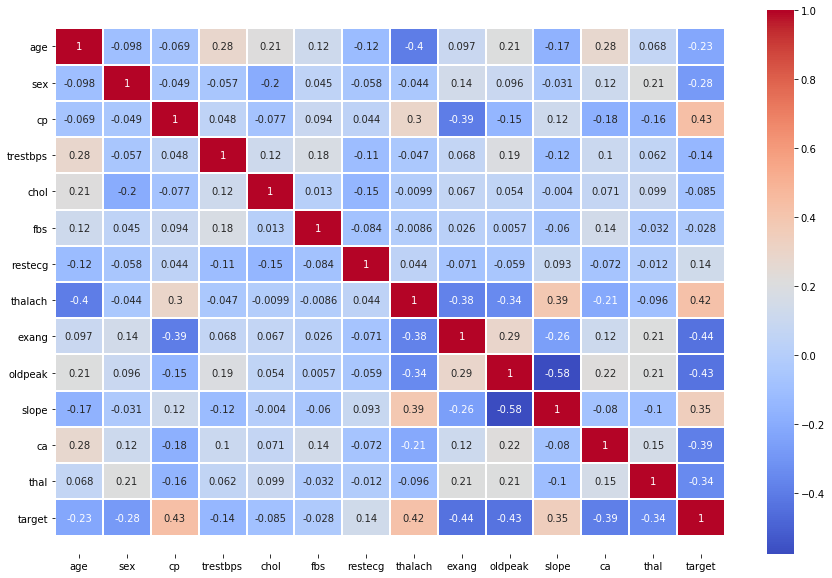

In [18]:
fig , ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True , linewidth=1.0 , linecolor='white')


bottom , top = ax.get_ylim()
ax.set_ylim(bottom +0.5 , top -0.5)

# 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
len(df)

303

In [21]:
# split the data into train and test split

x=df.drop('target',axis=1)
y=df['target']

np.shape(y)

(303,)

In [22]:
np.random.seed(0)

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2)

In [23]:
np.shape(x_test)

(61, 13)

In [24]:
np.random.seed(0)

model1= LogisticRegression()
model1.fit(x_train , y_train)
modell=model1.score(x_test , y_test)


model2 = KNeighborsClassifier()
model2.fit(x_train , y_train)
modelk=model2.score(x_test , y_test)

model3= RandomForestClassifier()
model3.fit(x_train , y_train)
modelr=model3.score(x_test , y_test)


total_model={'logistic regression ':modell*100,'K nearest neighboiur ' : modelk*100,'Random forest  ': modelr*100}
total_model

C:\Users\kunal.sharma2395\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'logistic regression ': 85.24590163934425,
 'K nearest neighboiur ': 63.934426229508205,
 'Random forest  ': 88.52459016393442}

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

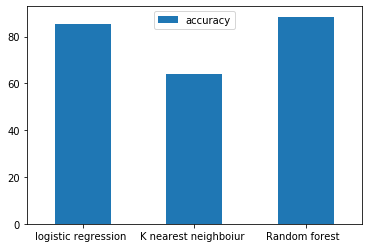

In [25]:
model_compare = pd.DataFrame(total_model,index=['accuracy'])
model_compare.T.plot(kind='bar')
plt.xticks(rotation=0)

# Hyperparametes tuning with RandomizeserchCV

In [26]:
# create a hyperparameter grid for logistic regression

log_reg_grid = {'C': np.logspace(-4 , 4 , 20),
                'solver': ['liblinear']}

# create a hyperparameter grid for random forest

rf_grid= {'n_estimators':np.arange(10 , 1000 , 50),
          'max_depth' : [None, 3 , 5 , 10],
          'min_samples_split' : np.arange(2 , 20 , 2),
          'min_samples_leaf' : np.arange(1 , 20 , 3)}

In [27]:
# Tune logistic regression

np.random.seed(0)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20 , cv=5 , verbose=True)

rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [29]:
rs_log_reg.score(x_test , y_test)

0.8524590163934426

In [30]:
# tune for random forest

np.random.seed(0)

rs_rf = RandomizedSearchCV(RandomForestClassifier() ,param_distributions=rf_grid , n_iter=20 , cv=5 , verbose=True)


rs_rf.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [31]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 5}

In [32]:
rs_rf.score(x_test , y_test)

0.8524590163934426

# Hyperparameter tuning with gridsearchCV


In [33]:
# different params for logistic regression

log_reg_grid= {'C': np.logspace(-4,4,30),
               'solver' : ['liblinear']}

gs_log_reg= GridSearchCV(LogisticRegression() , param_grid=log_reg_grid , cv=5 , verbose = True)


gs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [34]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(x_test , y_test)

0.8524590163934426

# Evaluating our tuned machine learing classifier , beyond accuracy

In [37]:
y_preds = gs_log_reg.predict(x_test)

In [38]:
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

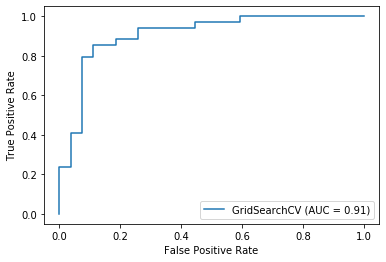

In [40]:
plot_roc_curve(gs_log_reg, x_test , y_test)

In [41]:
print(confusion_matrix(y_test , y_preds))

[[22  5]
 [ 4 30]]


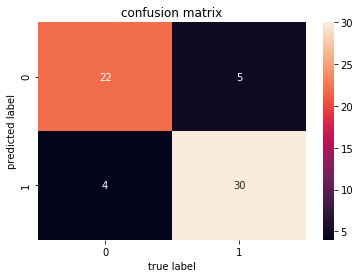

In [42]:
def plot_conf_mat(y_test , y_preds):
    
    sns.heatmap(confusion_matrix(y_test , y_preds),annot = True)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title('confusion matrix')
    
    
plot_conf_mat(y_test , y_preds)

In [43]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## calculate evaluation matrix using cross_val_score

In [44]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [45]:
model=LogisticRegression(C=1.3738237958832638 , solver='liblinear')

In [46]:
cv=cross_val_score(model , x, y ,cv=5 , scoring='accuracy')
cv

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [47]:
np.mean(cv)

0.8215300546448088

In [48]:
cv_precision=cross_val_score(model , x , y , cv=5 , scoring='precision')
cv_precision

array([0.78947368, 0.90322581, 0.85294118, 0.83333333, 0.71052632])

In [49]:
np.mean(cv_precision)

0.817900063251107

In [50]:
cv_recall=cross_val_score(model , x , y , cv=5 , scoring = 'recall')
cv_recall

array([0.90909091, 0.84848485, 0.87878788, 0.90909091, 0.81818182])

In [51]:
np.mean(cv_recall)

0.8727272727272727

In [52]:
cv_f= cross_val_score(model , x , y , cv=5 , scoring = 'f1')
cv_f

array([0.84507042, 0.875     , 0.86567164, 0.86956522, 0.76056338])

In [57]:
np.mean(cv_f)

0.8431741323998502

In [55]:
cv_metrics = pd.DataFrame({"Accuracy": cv,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

ValueError: Shape of passed values is (5, 4), indices imply (1, 4)

In [62]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [63]:
clf.coef_

array([[ 0.00407775, -0.95728964,  0.63785997, -0.00948753, -0.0027512 ,
        -0.1661072 ,  0.15292919,  0.02677733, -0.57828877, -0.48950221,
         0.1540638 , -0.72894777, -0.54862498]])

In [64]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.004077747859308126,
 'sex': -0.9572896398184151,
 'cp': 0.637859965566012,
 'trestbps': -0.009487525128653468,
 'chol': -0.00275119946181216,
 'fbs': -0.1661072047952176,
 'restecg': 0.1529291942100729,
 'thalach': 0.026777330240354977,
 'exang': -0.5782887708954897,
 'oldpeak': -0.4895022134188698,
 'slope': 0.15406380456776528,
 'ca': -0.7289477747874273,
 'thal': -0.5486249782781407}

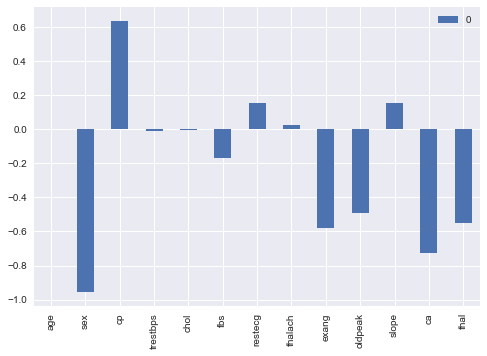

In [65]:
features_df= pd.DataFrame(features_dict , index=[0])
plt.style.use('seaborn')
features_df.T.plot(kind='bar')

In [66]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


# Thank You